In [20]:
import numpy as np
from scipy.stats import norm, expon, chi2, uniform
import matplotlib.pyplot as plt
%matplotlib inline

# Standard distributions sampling
## Ex 1.
Use scipy to take samples from the following distributions:
1. Normal distribution with $\mu$=1 and $\sigma$=4,
2. Exponential distribution with $\lambda = \dfrac{1}{4}$,
3. Chi-squared distribution with 8 degrees of freedom,
4. Uniform distribution with borders [$-2\sqrt{3}, 6\sqrt{3}$].

Compare their theoretical and sample distribution, mean and variance.

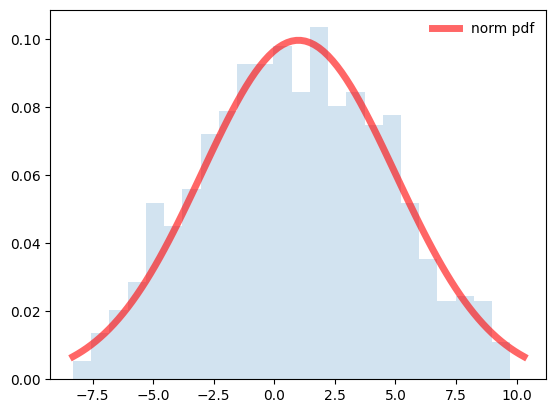

Distribution mean: 1.0
Distribution variance: 16.0
Sample mean: 0.8351666116240459
Sample variance: 17.0027956599842


In [21]:
#1. Normal
#This one I'll do for you :-)

rv_norm = norm(loc = 1, scale = 4)
x = np.linspace(rv_norm.ppf(0.01), rv_norm.ppf(0.99), 100)
fig, ax = plt.subplots(1, 1)
ax.plot(x, rv_norm.pdf(x), 'r-', lw=5, alpha=0.6, label='norm pdf')
r = rv_norm.rvs(size=1000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2, bins = x[::4])


ax.legend(loc='best', frameon=False)
plt.show()

print("Distribution mean: {0}".format(rv_norm.stats(moments='m')))
print("Distribution variance: {0}".format(rv_norm.stats(moments='v')))
print("Sample mean: {0}".format(np.mean(r)))
print("Sample variance: {0}".format(np.var(r)))

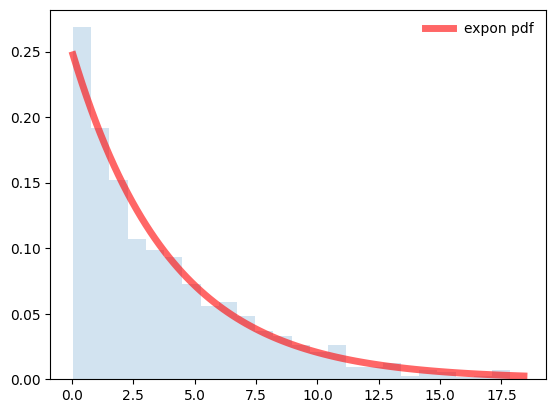

Distribution mean: 4.0
Distribution variance: 16.0
Sample mean: 3.844475226107045
Sample variance: 14.071744766997037


In [22]:
#Exponential
rv_expon = expon(scale = 4)
x = np.linspace(rv_expon.ppf(0.01), rv_expon.ppf(0.99), 100)
fig, ax = plt.subplots(1, 1)
ax.plot(x, rv_expon.pdf(x), 'r-', lw=5, alpha=0.6, label='expon pdf')
r = rv_expon.rvs(size=1000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2, bins = x[::4])


ax.legend(loc='best', frameon=False)
plt.show()

print("Distribution mean: {0}".format(rv_expon.stats(moments='m')))
print("Distribution variance: {0}".format(rv_expon.stats(moments='v')))
print("Sample mean: {0}".format(np.mean(r)))
print("Sample variance: {0}".format(np.var(r)))

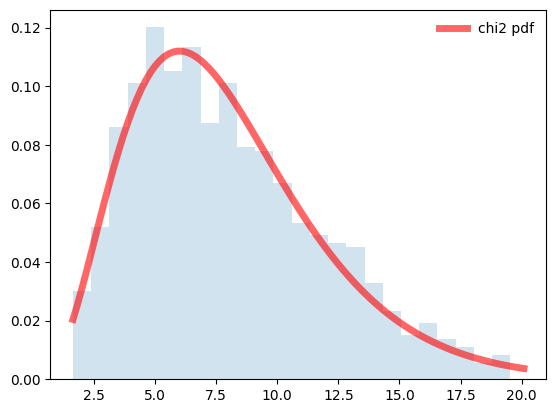

Distribution mean: 8.0
Distribution variance: 16.0
Sample mean: 8.11214886087952
Sample variance: 16.863722845156946


In [23]:
rv_chi2 = chi2(8)
x = np.linspace(rv_chi2.ppf(0.01), rv_chi2.ppf(0.99), 100)
fig, ax = plt.subplots(1, 1)
ax.plot(x, rv_chi2.pdf(x), 'r-', lw=5, alpha=0.6, label='chi2 pdf')
r = rv_chi2.rvs(size=1000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2, bins = x[::4])


ax.legend(loc='best', frameon=False)
plt.show()

print("Distribution mean: {0}".format(rv_chi2.stats(moments='m')))
print("Distribution variance: {0}".format(rv_chi2.stats(moments='v')))
print("Sample mean: {0}".format(np.mean(r)))
print("Sample variance: {0}".format(np.var(r)))

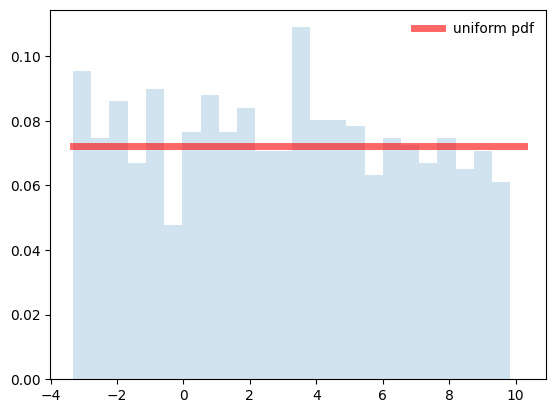

Distribution mean: 3.4641016151377544
Distribution variance: 15.999999999999998
Sample mean: 3.2157411082188
Sample variance: 15.620911360646238


In [24]:
rv_uniform = uniform(loc=(-2)*np.sqrt(3), scale= 6*np.sqrt(3)-((-2)*np.sqrt(3)))
x = np.linspace(rv_uniform.ppf(0.01), rv_uniform.ppf(0.99), 100)
fig, ax = plt.subplots(1, 1)
ax.plot(x, rv_uniform.pdf(x), 'r-', lw=5, alpha=0.6, label='uniform pdf')
r = rv_uniform.rvs(size=1000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2, bins = x[::4])


ax.legend(loc='best', frameon=False)
plt.show()

print("Distribution mean: {0}".format(rv_uniform.stats(moments='m')))
print("Distribution variance: {0}".format(rv_uniform.stats(moments='v')))
print("Sample mean: {0}".format(np.mean(r)))
print("Sample variance: {0}".format(np.var(r)))

The lowest distribution means is in normal distribution and the biggest is in chi2.
Distribution variance is similar in each of these distributions equal to 16.
The sample mean  is the lowest in normal distribution and the highest in chi2. 
Sample variance is the highest in a normal distribution and the lowest in exponential.

# Low of large numbers. Central Limit Theorem.
## Ex 2.
a) For N from 2 to 1000 draw N samples from distributions defined in Ex 1. Plot sample variance and mean against the size of the sample. 

In [25]:
def calculate_var_and_mean(rv_distribution):
    var = []
    mean = []

    for N in range(2,1001):
        x = rv_distribution.rvs(size=N)
        var.append(np.var(x))
        mean.append(np.mean(x))

    return var, mean

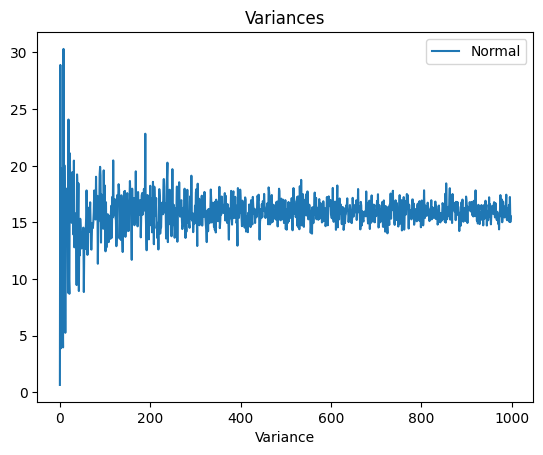

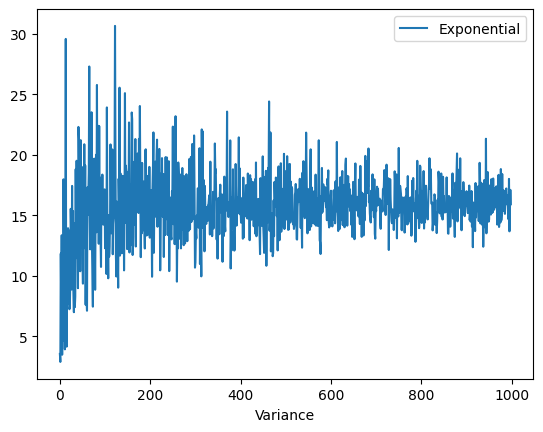

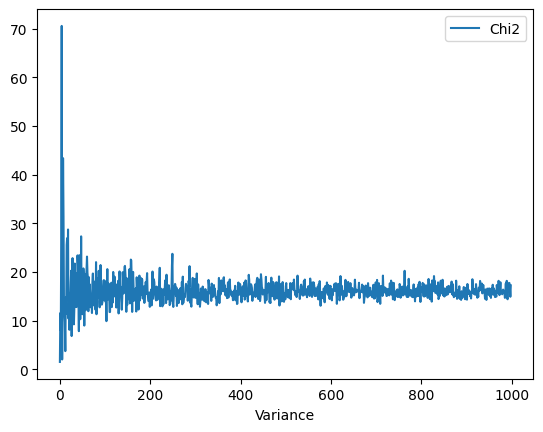

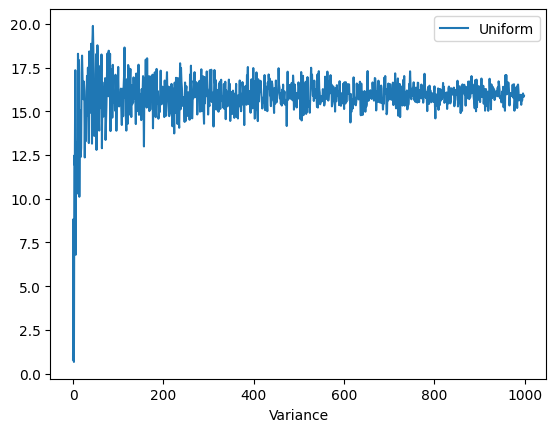

In [26]:
distriubions = [rv_norm, rv_expon, rv_chi2, rv_uniform]
labels = ["Normal", "Exponential", "Chi2", "Uniform"]
all_variances = []
all_means = []
for distriubion in distriubions:
    var, mean = calculate_var_and_mean(distriubion)
    all_variances.append(var)
    all_means.append(mean)

plt.title("Variances")
for i in range(4):
    plt.plot(all_variances[i], label=labels[i])
    plt.xlabel("Saple size")
    plt.xlabel("Variance")
    plt.legend()
    plt.show()

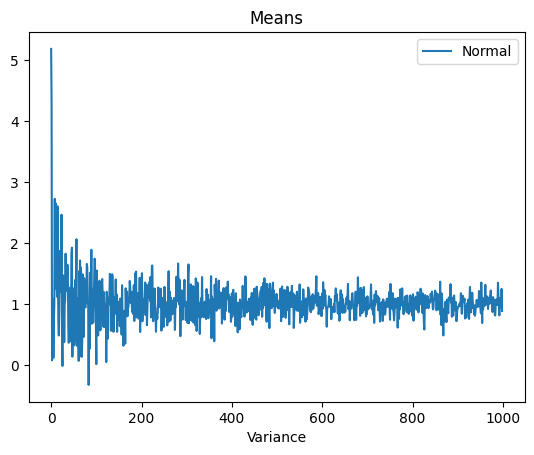

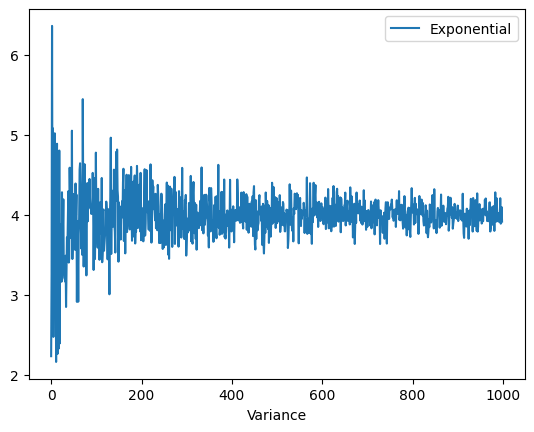

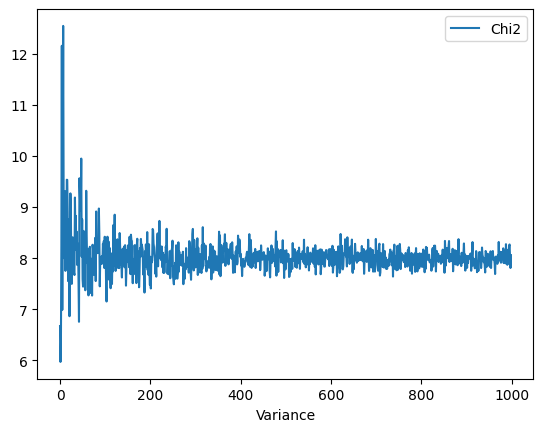

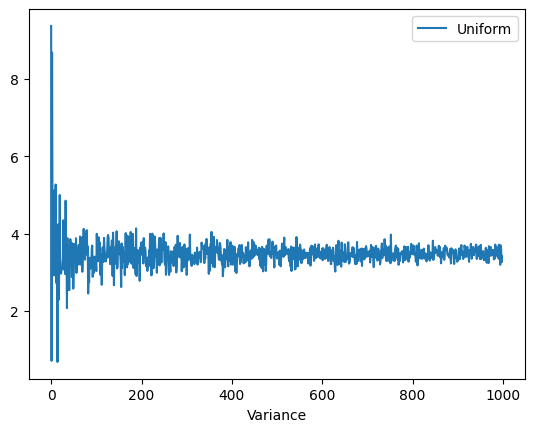

In [27]:
plt.title("Means")
for i in range(4):
    plt.plot(all_means[i], label=labels[i])
    plt.xlabel("Saple size")
    plt.xlabel("Variance")
    plt.legend()
    plt.show()

## Ex 3.
For N=1,4,9,16 draw histograms of an average over N samples taken from distributions defined in Ex 1. 

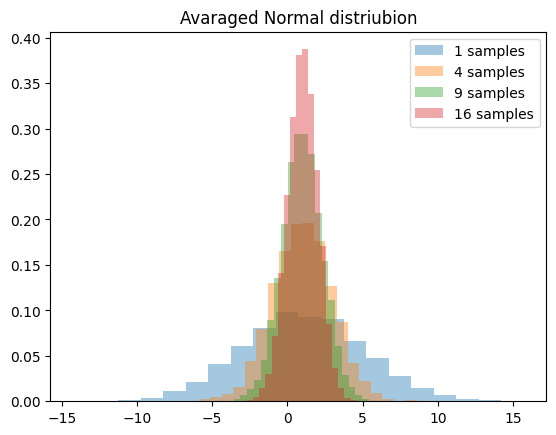

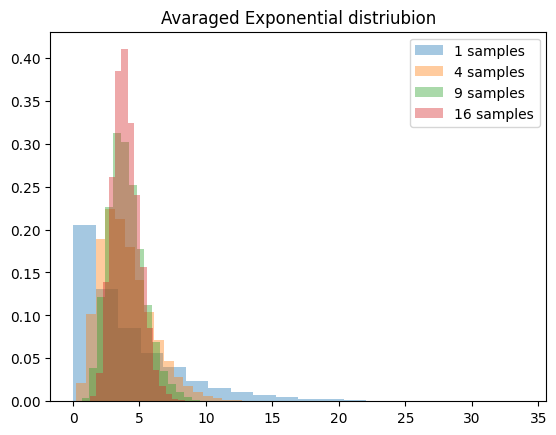

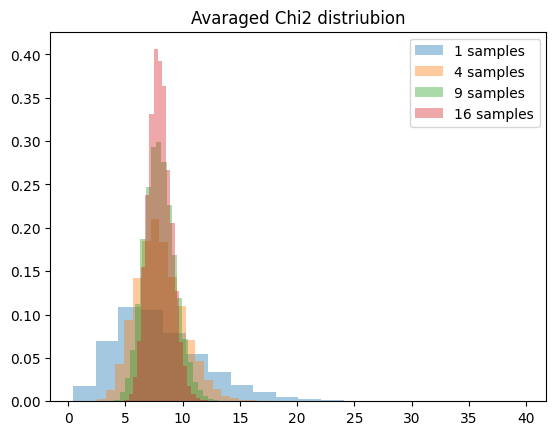

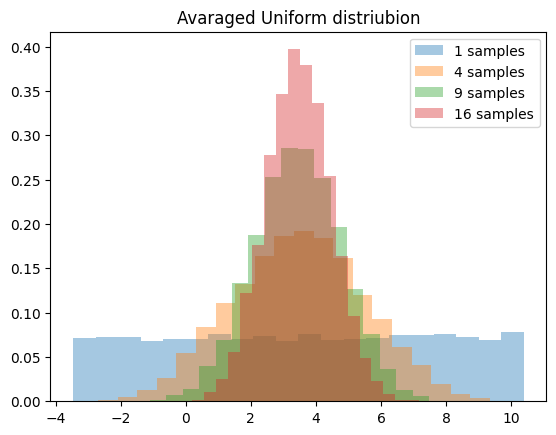

In [49]:
distriubions = [rv_norm, rv_expon, rv_chi2, rv_uniform]
labels = ["Normal", "Exponential", "Chi2", "Uniform"]

samples = [1,4,9,16]
for i in range(len(distriubions)):
    rv_distribution = distriubions[i]
    fig, ax = plt.subplots(1, 1)
    plt.title("Avaraged " + labels[i] + " distriubion")
    for N in samples:
        r = [(np.sum(rv_distribution.rvs(size=N))/N) for i in range(10000)]

        ax.hist(r, density=True, histtype='stepfilled', alpha=0.4, bins = 20, label=(str(N) +" samples"))

    plt.legend()
    plt.show()


# Arbitrary distribution sampling

Sometimes it may happen, that we need to sample from a custom distribution, not implemented in any standard library. There exist a simple algorithm for such sampling, provided that the distribution is bounded (pdf has finite support and maximum).


#### Accept-rejection sampling
Let the distribution be given by the pdf $g(x)$ and defined at interval $[a,b]$. In addition, let $M$ be the supremum of $g(x)$.

1. Take a sample $t$ from the uniform distribution at the interval $[a,b]$,
2. Take a sample $u$ from the uniform distribution at the interval $[0,M]$,
3. If $g(t) > u$ we accept $t$ as a sample taken from the original distribution. If not, we go back to 1.

## Ex 4. 
Implement function accept_rejection_sampling(dist, size = 1) which samples from any bounded distribution on the [0,1] interval.

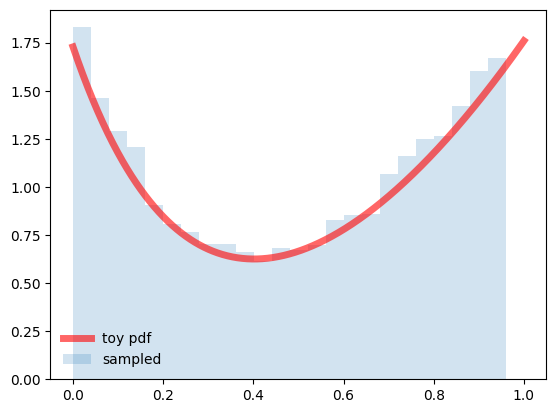

In [52]:
def toy_dist(x):
    C = 1/3 - np.exp(-4)/4 + 1/4
    return (x**2 + np.exp(-4*x)) / C 

x = np.linspace(0,1,1000)

def accept_rejection_sampling(dist, size = 1):
    samples = []
    while len(samples) < size:
        t = uniform.rvs(0, 1)
        u = uniform.rvs(0, max(dist))
        if toy_dist(t) > u:
            samples.append(t)
    return samples


samples = accept_rejection_sampling(toy_dist(x), size = 10000)

fig, ax = plt.subplots(1, 1)
ax.plot(x, toy_dist(x), 'r-', lw=5, alpha=0.6, label='toy pdf')
ax.hist(samples, density=True, histtype='stepfilled', alpha=0.2, bins = x[::40], label = "sampled")
ax.legend(loc='best', frameon=False)
plt.show()

# Probability space matters!
## Ex 5
Sample 2000 points from the unit disk. Do it in following ways:
1. Assume uniform distribution of radius (0,1) and argument (0,2$\pi$),  
2. Assume uniform distribution of x and y coordinate (-1,1). Drop values laying outside of the disk.   
Explain differences. between 1. and 2. Then:
3. Modify the solution of point 1. by changing the distribution of the radius in such a way, that we result in 2D distribution from 2.

In [53]:
#Version 1

sample_num = 2000

uniform_radius = uniform(0, 1)
uniform_pi = uniform(0, 2*np.pi)

radius_samples = uniform_radius.rvs(sample_num)
pi_samples = uniform_pi.rvs(sample_num)

x = radius_samples * np.sin(pi_samples)
y = radius_samples * np.cos(pi_samples)

Text(0, 0.5, 'counts')

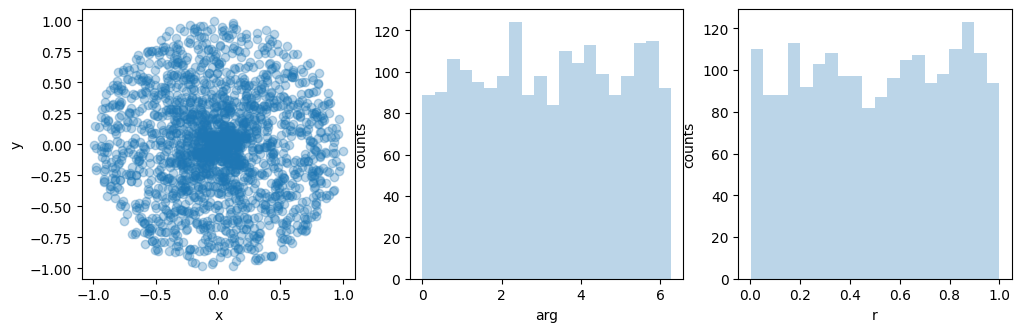

In [59]:
plt.figure(figsize=(12, 3.5))
alpha = 0.3
bins = 20

plt.subplot(1, 3, 1)
plt.scatter(x, y, alpha=alpha)
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(1, 3, 2)
plt.hist(pi_samples, histtype='stepfilled', alpha=alpha, bins=bins)
plt.xlabel('arg')
plt.ylabel('counts')

plt.subplot(1, 3, 3)
plt.hist(radius_samples, histtype='stepfilled', alpha=alpha, bins=bins)
plt.xlabel('r')
plt.ylabel('counts')

In [70]:
#Version 2

# Assume uniform distribution of x and y coordinate (-1,1). Drop values laying outside of the disk.

uniform_point = uniform(scale=2, loc=-1)
points_x = uniform_point.rvs(sample_num)
points_y = uniform_point.rvs(sample_num)

inside_points_x = []
inside_points_y = []

for x,y in zip(points_x,points_y):
    if (x**2 + y**2)**(1/2) < 1: #is inside
        inside_points_x.append(x)
        inside_points_y.append(y)


Text(0, 0.5, 'counts')

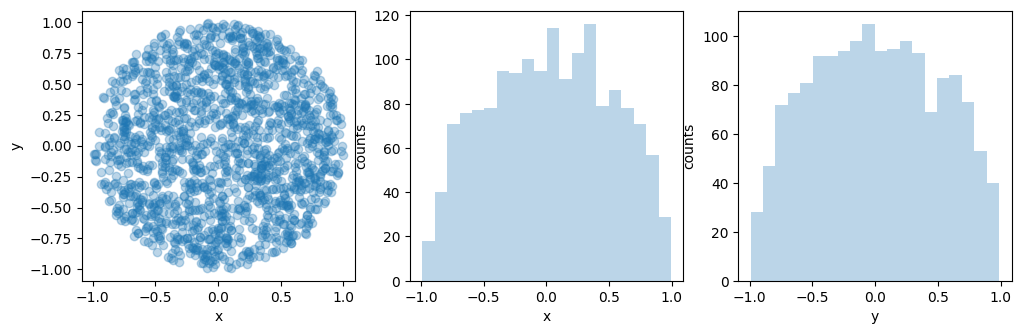

In [71]:
plt.figure(figsize=(12, 3.5))

plt.subplot(1, 3, 1)
plt.scatter(inside_points_x, inside_points_y, alpha=alpha)
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(1, 3, 2)
plt.hist(inside_points_x, histtype='stepfilled', alpha=alpha, bins=bins)
plt.xlabel('x')
plt.ylabel('counts')

plt.subplot(1, 3, 3)
plt.hist(inside_points_y, histtype='stepfilled', alpha=alpha, bins=bins)
plt.xlabel('y')
plt.ylabel('counts')

Version 1 gives uniform distribution but in the circle, more points are concentrated in the centre. Although in version 2 we have a less uniform distribution of points they are more evenly placed on the circle

In [75]:
# Version 3

# 3. Modify the solution of point 1. by changing the distribution of the radius in such a way, that we result in 2D distribution from 2.

uniform_radius = uniform(0, 1)
uniform_pi = uniform(0, 2*np.pi)

r = np.sqrt(1-uniform_radius.rvs(sample_num))
pi_samples = uniform_pi.rvs(sample_num)

x = r * np.sin(pi_samples)
y = r * np.cos(pi_samples)

Text(0, 0.5, 'counts')

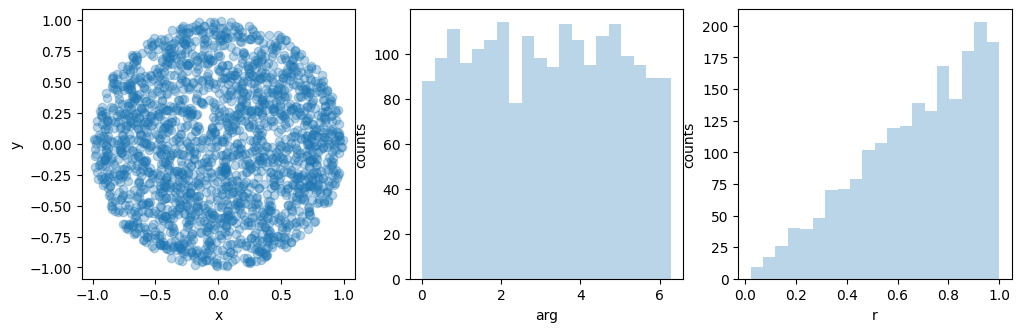

In [76]:
plt.figure(figsize=(12, 3.5))

plt.subplot(1, 3, 1)
plt.scatter(x, y, alpha=alpha)
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(1, 3, 2)
plt.hist(pi_samples, histtype='stepfilled', alpha=alpha, bins=bins)
plt.xlabel('arg')
plt.ylabel('counts')

plt.subplot(1, 3, 3)
plt.hist(r, histtype='stepfilled', alpha=alpha, bins=bins)
plt.xlabel('r')
plt.ylabel('counts')

## Application: Laplace equation, Dirichlet boundary conditions

#### Monte-Carlo procedure for solving 2D Laplace equation with Dirichlet boundary conditions
1. Start in a random position inside the boundaries,
2. With an equal probability move up/down/right/left until you hit the boundary,
3. After hitting the boundary we take the value $v_{b}$ of the function in the hitting point. We update the values of all points along the just finished random walk using the formula:
$$ v_{new} = \dfrac{nv_{old} + v_{b}}{n+1}, $$
where $n$ is a number of random walks which have already passed through this point.
4. Finish if the desired precision is achieved. If not, go back to 1.


A theory behind the above procedure can be found here:
https://www.uzh.ch/cmsssl/physik/dam/jcr:d559688c-1e7f-44ca-9fbe-aab0755c0b6e/empp18_MC_Markov.pdf

## Ex 6
Implement the method described above and solve numerically given Dirichlet problem. Plot few intermediate steps.

In [82]:
S = 100 # Decrease if computations take too long
plane = np.zeros((S,S))
plane_counts = np.zeros((S,S))
plane[0] = np.cos(np.linspace(-1.5,1.5,S)*2*np.pi)
plane[-1] = -np.cos(np.linspace(-1,1,S)*2*np.pi)
plane[:,0] = np.cos(np.linspace(-0.5,0.5,S)*2*np.pi)
plane[:,-1] = -2+np.linspace(-1,1,S)**2

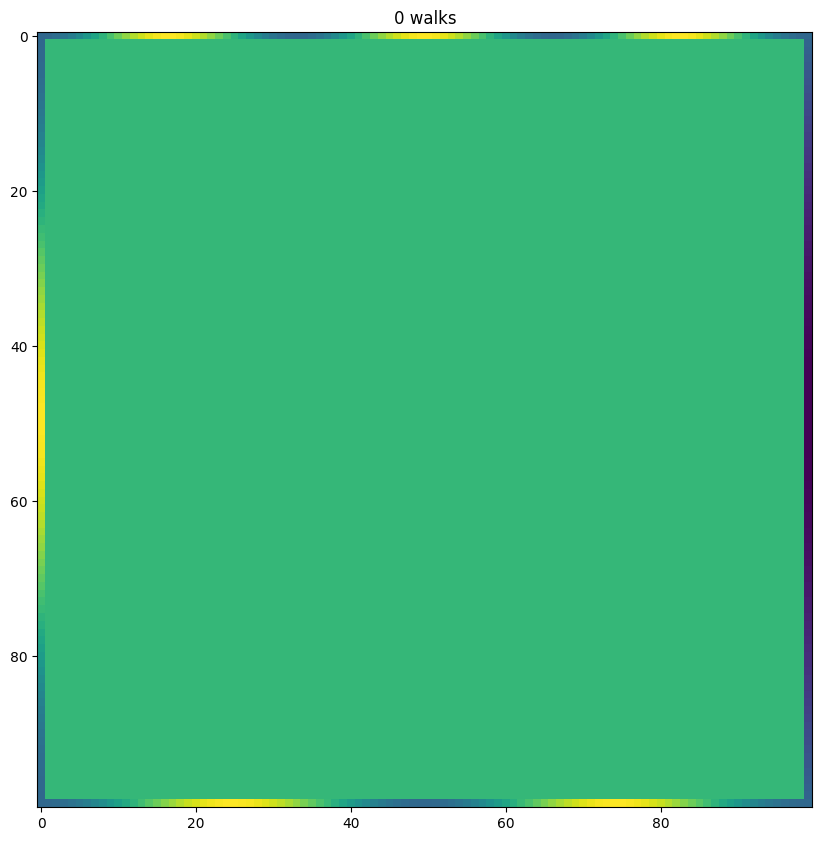

In [78]:
plt.figure(figsize=(10,15))
plt.title("0 walks")
plt.imshow(plane)

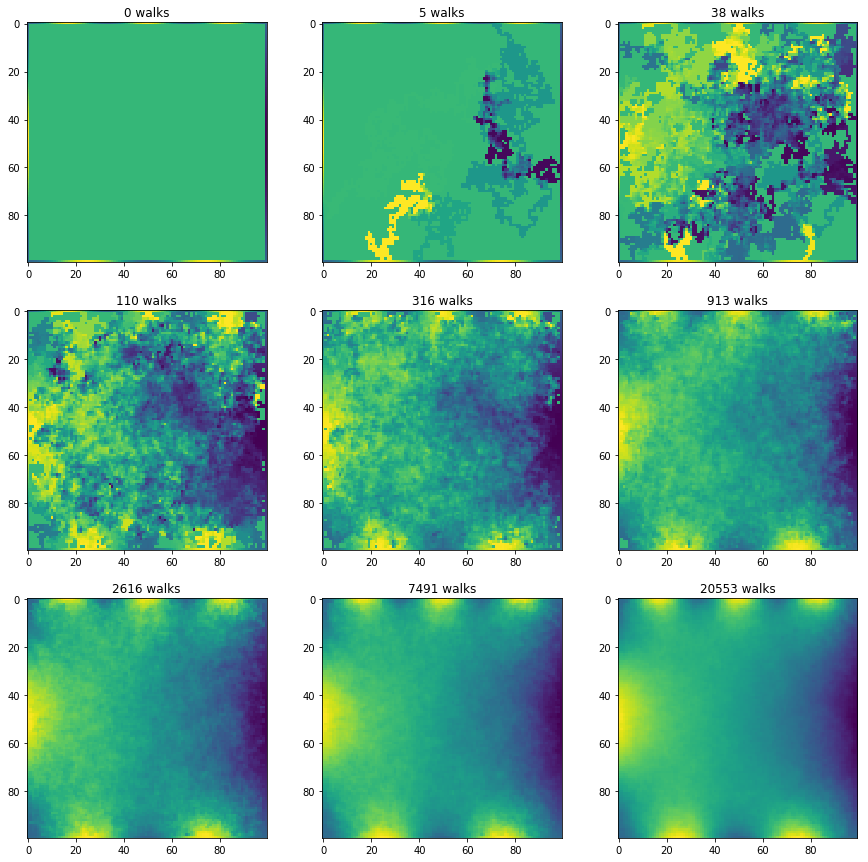

In [ ]:
#Animation code for testing purposes. May not work on your machine.


%matplotlib qt

import matplotlib.animation as animation 

fig = plt.figure()
plt.title("0 walks")
im = plt.imshow(planes[0])
im.set_array(planes[0])

# function to update figure
def updatefig(j):
    # set the data in the axesimage object
    im.set_array(planes[j])
    plt.title("{0} walks".format(walks[j]))
    return [im]
# kick off the animation
ani = animation.FuncAnimation(fig, updatefig, frames=range(1000), interval=1000)
plt.show()